Extracting features from train


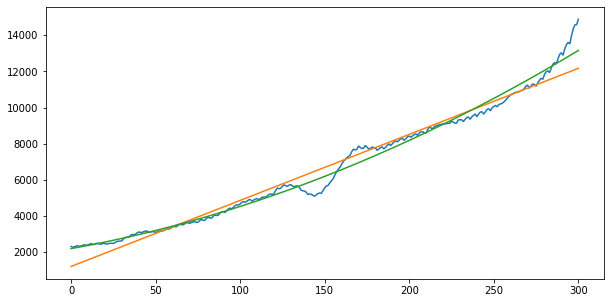

label: 0
file: 1
grad
1.0
r1
102363262.39696692
r2
42507903.3322551


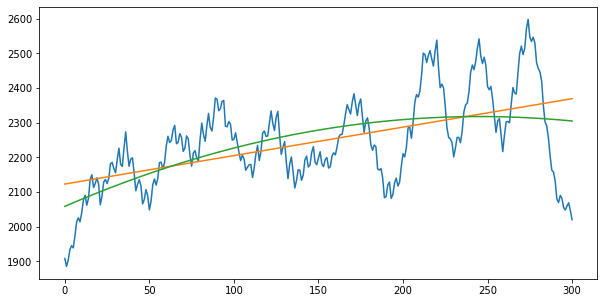

label: 1
file: 2
grad
0.6345514950166113
r1
3820946.5823641066
r2
3566196.6618573093


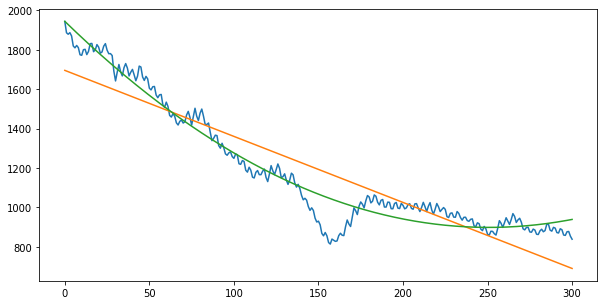

label: 2
file: 3
grad
-0.6677740863787376
r1
5159363.03899566
r2
1361315.5822114055


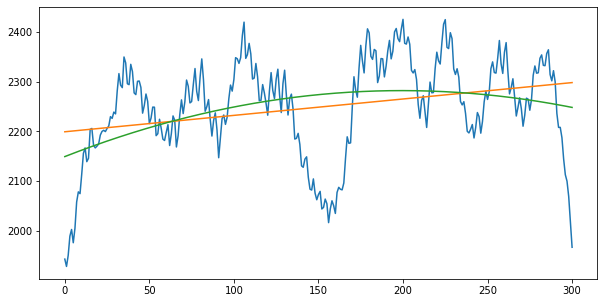

label: 1
file: 4
grad
0.3289036544850498
r1
2777321.935116337
r2
2623849.56669404


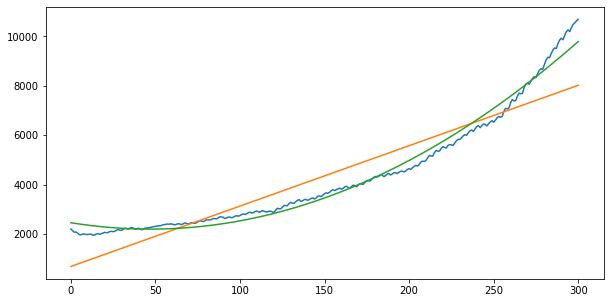

label: 0
file: 5
grad
0.6877076411960132
r1
219040932.58299324
r2
26120446.641686704


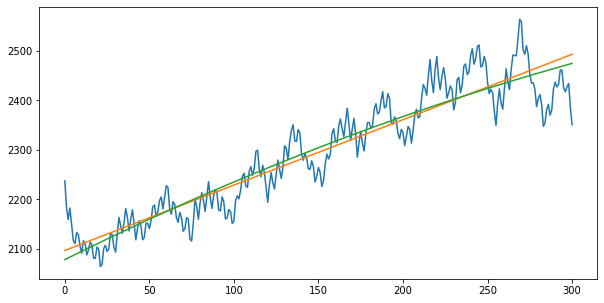

label: 1
file: 6
grad
1.0
r1
587450.3254334579
r2
566470.313787728


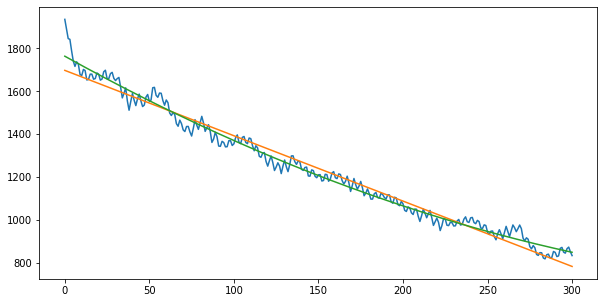

label: 2
file: 7
grad
-1.0
r1
592793.2699582664
r2
324890.318183068


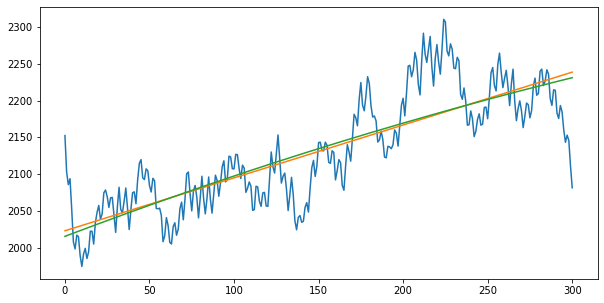

label: 1
file: 8
grad
1.0
r1
594730.6276990746
r2
591210.9275126649


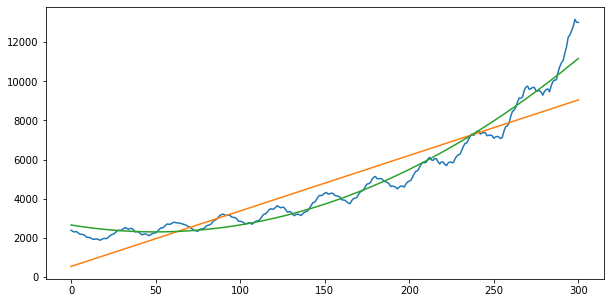

label: 0
file: 9
grad
0.6677740863787376
r1
346176393.6323625
r2
70010461.79258436


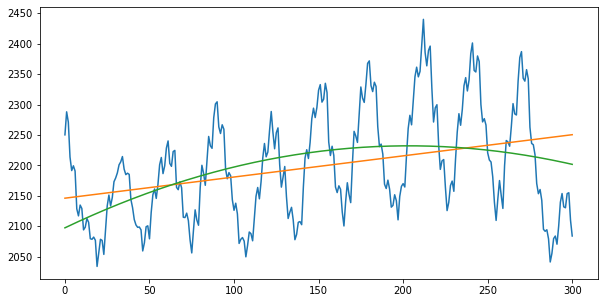

label: 1
file: 10
grad
0.3554817275747508
r1
2100295.7034680573
r2
1954760.8757251566


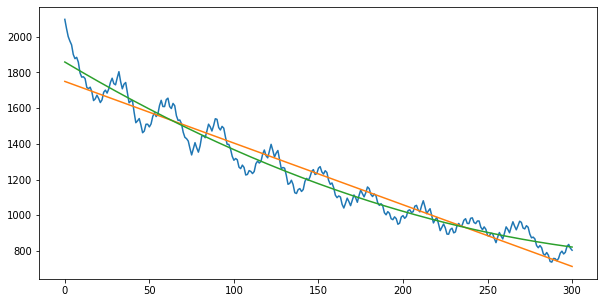

label: 2
file: 11
grad
-1.0
r1
1938100.9827779576
r2
1212944.9311238534


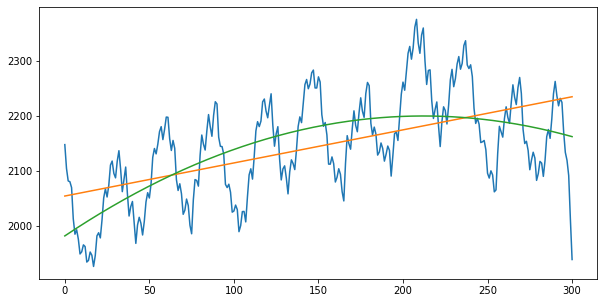

label: 1
file: 12
grad
0.4152823920265781
r1
1842548.7340532977
r2
1518477.768465437


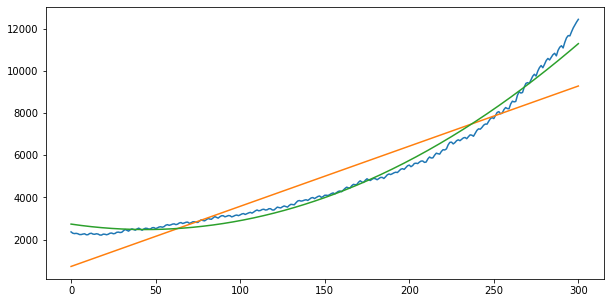

label: 0
file: 13
grad
0.707641196013289
r1
278936897.751838
r2
31532823.18496866


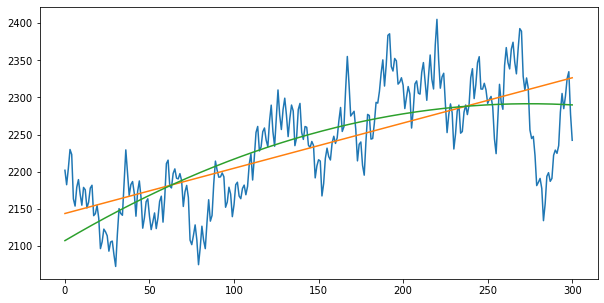

label: 1
file: 14
grad
0.8272425249169435
r1
822432.0901468478
r2
740293.3106342913


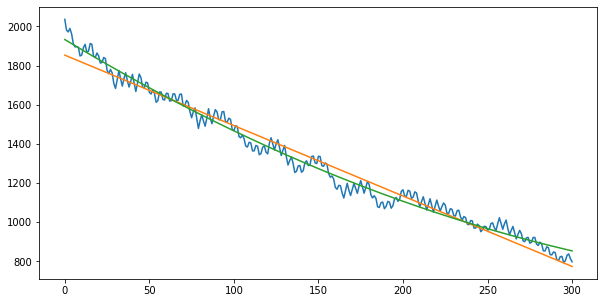

label: 2
file: 15
grad
-1.0
r1
810879.2014728902
r2
422002.41239823535


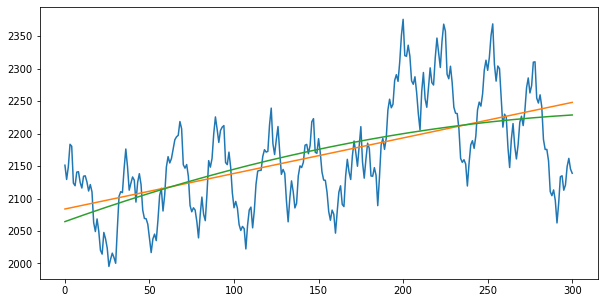

label: 1
file: 16
grad
1.0
r1
1354889.843127551
r2
1331735.2972398468


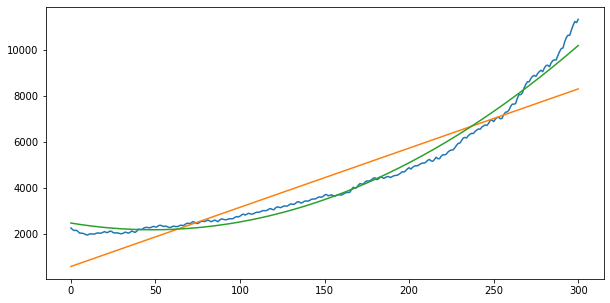

label: 0
file: 17
grad
0.6744186046511628
r1
247723802.3233124
r2
28591404.15252902


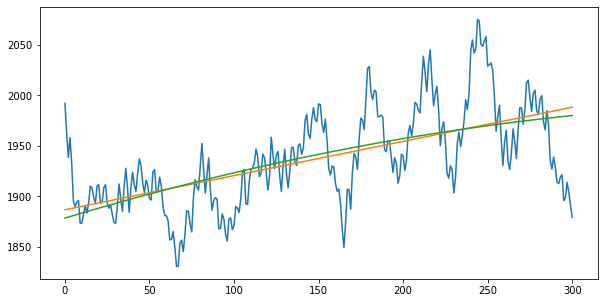

label: 1
file: 18
grad
1.0
r1
452434.49063350755
r2
448276.96727913036


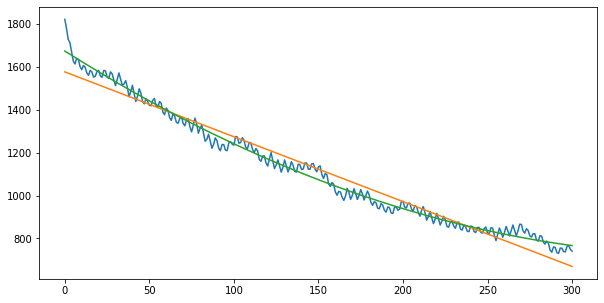

label: 2
file: 19
grad
-1.0
r1
824140.9823330106
r2
242617.90440679662


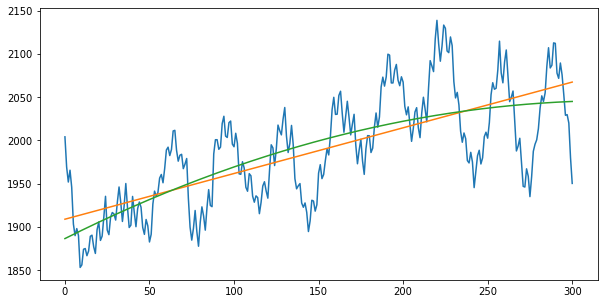

label: 1
file: 20
grad
1.0
r1
613098.2516765378
r2
582276.8902106485


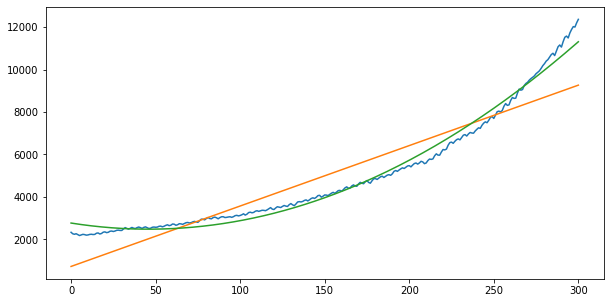

label: 0
file: 21
grad
0.6943521594684385
r1
286055099.53151596
r2
29594680.641766835
Extracting features from test


label: 0
file: 1
grad
-0.5290519877675841
r1
12881958.308530562
r2
11303165.612633282


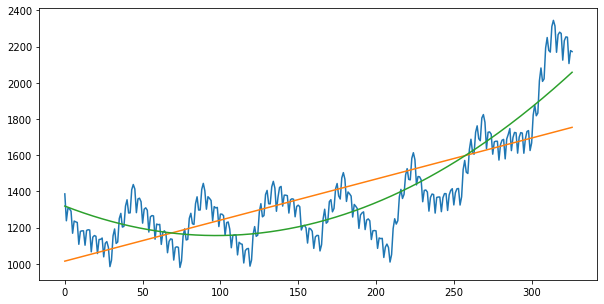

label: 1
file: 2
grad
0.40061162079510704
r1
12584854.15530851
r2
6417554.575735578


label: 2
file: 3
grad
-0.22324159021406728
r1
12688022.833318723
r2
9103432.93267184


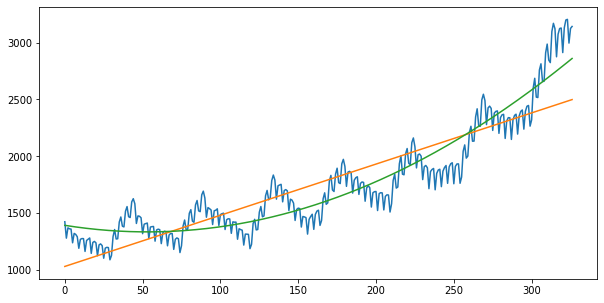

label: 1
file: 4
grad
0.6697247706422018
r1
17499042.35782619
r2
8806344.909516282


label: 0
file: 5
grad
-1.0
r1
16404099.22197602
r2
16132666.246767035


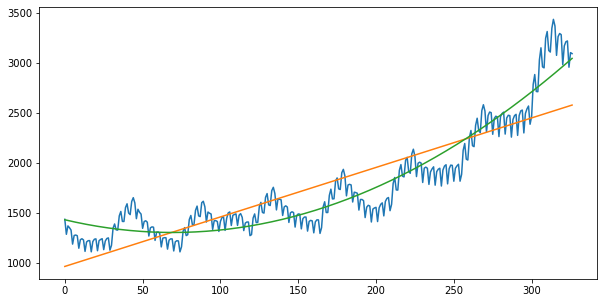

label: 1
file: 6
grad
0.5718654434250765
r1
24118280.108763333
r2
9603124.17494626


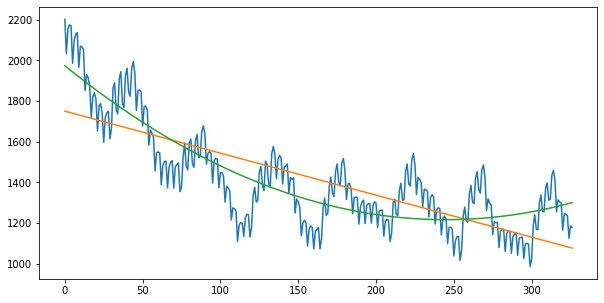

label: 2
file: 7
grad
-0.4984709480122324
r1
8885735.702549772
r2
5556192.609789091


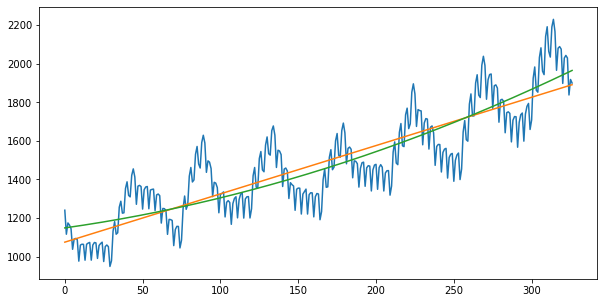

label: 1
file: 8
grad
1.0
r1
6395651.5624923045
r2
6031857.628878049


label: 0
file: 9
grad
-0.1620795107033639
r1
10363172.729383852
r2
9221319.189602153


label: 1
file: 10
grad
0.5840978593272171
r1
18640459.926372718
r2
6563384.602770744


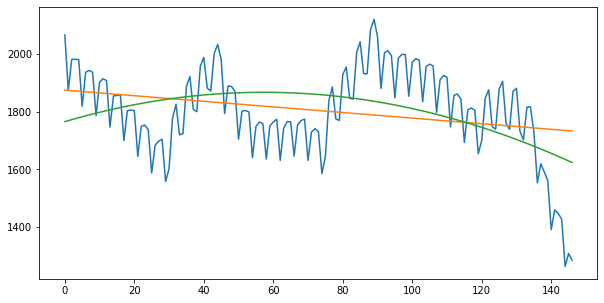

label: 2
file: 11
grad
-0.2108843537414966
r1
3331493.688783989
r2
2964096.929334826


label: 1
file: 12
grad
-0.5374149659863946
r1
4007014.15784192
r2
3131124.964138913


label: 0
file: 13
grad
-0.2925170068027211
r1
3600159.3190777167
r2
3365532.338354041


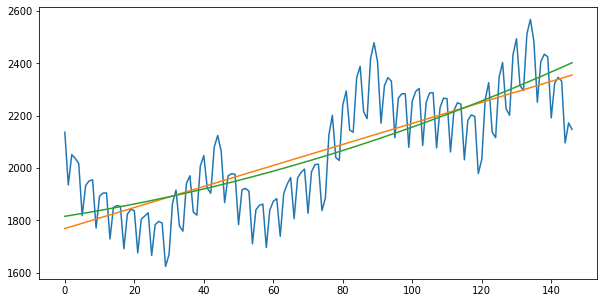

label: 1
file: 14
grad
1.0
r1
2942091.303174405
r2
2874863.3549248986


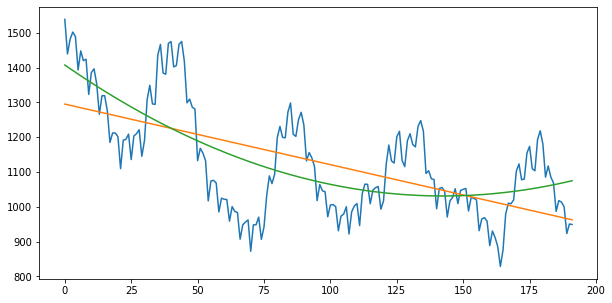

label: 2
file: 15
grad
-0.4895833333333333
r1
2995129.8105456075
r2
2496175.933623844


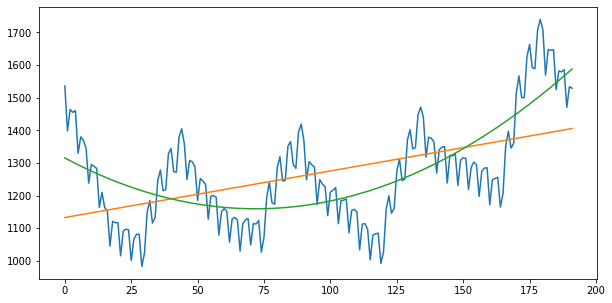

label: 1
file: 16
grad
0.25
r1
3783898.6483048582
r2
2464605.0345622255
Training the model
Predicting the sample
[0.15763146 0.26894396 0.108766   0.1782436  0.04039902 0.14790961
 0.09810636]


ValueError: Found input variables with inconsistent numbers of samples: [14, 16]

In [249]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import sklearn.ensemble as ens
import scipy.stats as stat1
import statistics  as stat2
import tsfresh as tsf
import random
from natsort import natsorted

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import svm

###########################################
#   CONSTANTS
###########################################

PLOT_GRAPH = True

MAX_TRAIN_BATCH_SIZE = 20

#split the whole sample in little pieces, every n frame, set to false if no splitting is needed
SPLIT_SAMPLE_FRAME = 350

### pre-preocessing
REMOVING_OUTLIERS = True
AFTER_OUTLIER_WINDOW = 4

SMOOTHING_WINDOW = 15
SCALING = True

#trainig and testing samples' folder
samplePath = os.path.join('..','captured','capVBR-4DIR')
realPath = os.path.join('..','captured','APERTO_results')

#testing labels (that are not in order)
#front(0), right(1), back(2), left(3->1)
y_test = [2,0,2,0,2,0,2,0,2,0,1,1,1,1] #aperto
#y_test += [2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,2] #all

######### END CONSTANTS #########

def interval(array, min, max):
    count = 0 
    for i in array:
        if(min<=i<=max):
            count+=1
    return count/len(array)

def extractFeatures(path, train = False):
    #in the future getting the list of files in the whole directory
    #array with the ID column and the label column
   
    ###########################################
    #    READING DATA FROM FILE
    ###########################################
    ### data structure ###
    '''
    array of tuples, with the folliwing format:
    [ID, label, ft1, ft2, .., ftn-1, ftn], ID will go from 1 to len(samples),
    following the name of the files "PL_iterXY.csv"
    '''
    data = [[],[]]
    for i in range(100):
        data.append([])
    
    files = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        #only the files
        files.extend(filenames)
        #only the first level of directory
        break
   
    #################################################
    #   PREPROCESS AND FEAT. EXTRACTION OF EACH FILE
    #################################################
    file_scanned = 0
    #NATURAL SORTING 
    files = natsorted(files)
    for fileName in files:
        if(MAX_TRAIN_BATCH_SIZE != 0):
            if(MAX_TRAIN_BATCH_SIZE<file_scanned):
                break
            else:
                file_scanned+=1
        #reading the file
        df = pd.read_csv(os.path.join(path, fileName), header=None)
       
        if (SPLIT_SAMPLE_FRAME == False or train==False):
            number_of_split = 1
            length = len(df)
        else:
            number_of_split = len(df)//SPLIT_SAMPLE_FRAME
            length = SPLIT_SAMPLE_FRAME
        
        for split in range(0, number_of_split):
            daux = df[split*length: (split+1)*length]
                        
            ### pre-processing ###

            #################################################
            #   REMOVING THE OUTLIERS
            #################################################
            if(REMOVING_OUTLIERS == True):
                daux = daux[np.abs(daux-daux.mean()) <= (3.5*daux.std())]
                i = 0
                while i < len(daux):
                    #if the value is a nan
                    if(np.isnan(daux[0][i])):
                        if(i+AFTER_OUTLIER_WINDOW<len(daux)):
                            for j in range(1,AFTER_OUTLIER_WINDOW+1):
                                daux[0][i+j]= np.nan
                            i += AFTER_OUTLIER_WINDOW+1
                        else:
                            i+=1
                    else:
                        i+=1
               
                daux = daux.dropna()    
                    
            #################################################
            #   SMOOTHING THE DATA
            #################################################


            #daux = daux.rolling(SMOOTHING_WINDOW).median()
            #daux = daux.dropna()
            daux = daux.rolling(SMOOTHING_WINDOW).mean()
            daux = daux.dropna()

            #scaling data, with min-max scaler
            if (SCALING == True):
                std_scaler = preprocessing.MinMaxScaler()
                x_scaled = std_scaler.fit_transform(daux.values)
                daux = pd.DataFrame(x_scaled)

            #################################################
            #   LABELLING THE DATA
            #################################################
            #appending the ID
            data[0].append(file_scanned)
            #appending the label, the video are orderd in rotating directions, that is: front(0), right(1), back(2), left(3->1)
            label = (file_scanned-1)%4
            #merging left and right
            if label==3:
                label = 1
            data[1].append(label)


            #################################################
            #   EXTRACTING FEATURES
            #################################################
            xp = range(0, len(daux))

            p3 = np.polyfit(xp, daux, 3, full=True)
            p2 = np.polyfit(xp, daux, 2, full=True)
            p1 = np.polyfit(xp, daux, 1, full=True)
            #################################################
            #   PLOT GRAPH
            #################################################
            if(PLOT_GRAPH == True):
                plt.figure(figsize=(10,5))
                plt.plot(xp, daux, '-', xp, np.polyval(p1[0],xp), '-', xp, np.polyval(p2[0],xp))
                plt.show()
                print('label: '+str(label))
                print('file: '+str(file_scanned))

            ### feature-extraction ###
            aux =pd.to_numeric(daux.iloc[:,0])
            #m1
            data[2].append(p1[0][0][0])
            #q1
            data[3].append(p1[0][1][0])
            #residual 1
            data[4].append(p1[1][0])
            #a2
            data[5].append(p2[0][0])
            #b2
            data[6].append(p3[0][1])
            #c2
            data[7].append(p3[0][2])
            #stdev
            data[8].append(stat2.stdev(aux))
            #sum
            data[9].append(sum(aux))
            data[10].append(p2[1][0])
            
            data[20].append(interval(aux, 0.0, 0.3))
            data[21].append(interval(aux, 0.3, 0.5))
            data[22].append(interval(aux, 0.5, 0.8))
            data[23].append(interval(aux, 0.8, 1))
            #data[24].append(interval(aux,0.5,1)/interval(aux, 0, 0.5))
            
            if(aux.idxmax()/len(aux)>0.8):
                data[30].append(True)
            else:
                data[30].append(False)
                
            if(aux.idxmin()/len(aux)<0.2):
                data[31].append(True)
            else:
                data[31].append(False)
            
            #quadratic curve point
            
            p2_val = np.polyval(p2[0],xp)
            gradients = np.gradient(p2_val)
            for g in range(len(gradients)):
                if(gradients[g] > 0):
                    gradients[g] = 1
                if(gradients[g]<0):
                    gradients[g] = -1
            data[44].append(np.mean(gradients))
            print('grad')
            print(np.mean(gradients))
            print('r1')
            print(p1[1][0])
            print('r2')
            print(p2[1][0])
            
            
        
    dict = {
        'ID': data[0],
        'label': data[1],
        'm1': data[2],
        'q1': data[3],
        #'stdev': data[8],
        'r1': data[4],
        'a2': data[5],
        'b2': data[6],
        'c2': data[7],
        #'sum': data[9]
        'r2': data[10],
        #'quan2': data[20],
        #'quan4': data[21],
        #'quan6': data[22],
        #'quan8': data[23],
        #'rapp': data[24],
        #'max': data[30],
        #'min': data[31],
        #'grad': data[44]
        
        
    }
                

    df = pd.DataFrame(data=dict)
    
    return df
#END function extractFeatures


#################################################
#   TRAINING AND TESTING
#################################################


### splitting training-testing ###

print("Extracting features from train")
df_train = extractFeatures(samplePath, train=True)

#X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:, 2:], df_train['label'], test_size=0.33, random_state=42)


print("Extracting features from test")

df_test = extractFeatures(realPath)


X_train = df_train.iloc[:, 2:]
y_train = df_train['label']

X_test = df_test.iloc[:, 2:]


### selecting the classifier, fitting and predicting the label


#tree = svm.SVC(gamma='scale')
tree=ens.RandomForestClassifier(n_estimators=250, n_jobs=-1)
print("Training the model")
tree.fit(X_train, y_train) 
print("Predicting the sample")
y_pred=tree.predict(X_test)

print(tree.feature_importances_)
print(classification_report(y_test, y_pred)+'\n')
print("LABELS PREDICTED:\n"+str(list(y_pred))+'\n')
print("TRUE LABELS:\n"+str(list(y_test)))


   